In [2]:
# we will often import a number of extra packages into python. These are just a the ones we need today:
import math
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats


# The first thing you're likely to need is to turn all of those replicate values into averages, and compile those averages into a single array
data = np.genfromtxt('drylabXL.csv', dtype=float, delimiter=',', names=None) 

print(data)

# Note the format here; each row is a trial, each column is a different data set. 

[[0.    0.092 0.182 0.243 0.325 0.41 ]
 [0.    0.081 0.177 0.249 0.37  0.383]
 [0.    0.088 0.169 0.233 0.31  0.396]
 [0.    0.093 0.175 0.252 0.355 0.405]]


In [7]:
# take the average of the blank, so we can subtract it from each data point
blank_mean = np.mean(data[:,0])
#print(blank_mean)

absorbance = []
std =[]
columns = data.shape[1]

for x in range(columns):
    # here we calculate the average of each column. 
    
    average = np.mean(data[:,x])
    absorbance.append (average)
    
    #calculate the standard deviation of each column
    std_temp = np.std(data[:,x]) 
    std.append (std_temp)
    
    
    
# here i'm just converting standard deviation into a numpy array to make our lives easier later
# the append command as we use it here only works on regular lists, not numpy arrays, which is something to be aware of.
std = np.array(std)  

# but numpy arrays are way easier to do simple math with; say to 'correct' all of our absorbance values by subtracting the blank!
absorbance = np.array(absorbance) -  blank_mean

# x values should also be converted to a numpy arry
concentration = np.array([0, 9.36, 18.72, 28.08, 37.44, 44.54]) #mM

# use c to set the confidence you want (90 % is 0.90, for example)
c = 0.95
alpha = 1-c
# have you seen any command that might give you n without just inputting a number? To make your code more general for different data sets?
n = 3

t = stats.t.ppf(1-alpha/2, n-1)

CI_95 = std*(t/math.sqrt(n))


Text(0, 0.5, 'average absorbance')

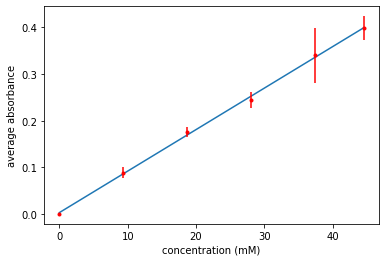

In [8]:
# Final complete process

#linear regression
m, b, R2, p, s_m = stats.linregress(concentration, absorbance)
# Use our predicted model
predict_y = (concentration*m)+b
# Plot the predicted data (note if we don't ask for a specific marker style, we'll just get a line)
plt.plot(concentration,predict_y)

#add the real data to the plot, just like we did before:
plt.errorbar(concentration, absorbance, yerr = CI_95, xerr = None, fmt = 'r.')
plt.xlabel("concentration (mM)")
plt.ylabel("average absorbance")

In [9]:
#Add the absorbance of your unknown here:

unknown = np.array([0.273,0.270,0.269])

unknown_av = np.mean(unknown)

unknown_std = np.std(unknown)

# now using m, b and unknown_density, solve for unknown_concentration
unknown_concentration = (unknown_av-b)/m

print ('the concentration of the unknown is ' + str(unknown_concentration) + ' mM')

#do your values match? If not, check your math!

the concentration of the unknown is 30.081102630356185 mM


In [25]:
def reg_error(x,y):
    import scipy.stats as stats
    import numpy as np
    m, b, R2, p, s_m = stats.linregress(x, y)
    # Manually calculate error in y 
    # standard error in most python packages is the error in the slope, rather than error in the y-predicitions of the model


    sum_square = 0

    n = len(y)

    ## so here, for every single point in our array, we're plugging in concentration, and comparing it to the actual measured absorbance
    # Again, note that our count variable does double duty; keeping track of the while loop, and calling the right array value! 

    for i in range(n):
        sum_square = sum_square + ((y[i]-(m*x[i])-b)**2)
    s_y = math.sqrt(sum_square/(n-2))
    x = np.array(x)
    s_b = math.sqrt((sum(x**2)*(s_m**2))/(len(x)))
    
    #print (F"the y error predicted by this linear regression model is {y_err} arbirtrary absorbance units")
    return(s_y, s_m, s_b)

In [29]:
s_y, s_m, s_b = reg_error(concentration,absorbance)

print(F"Y error in this prediction is {s_y}. The slope error is {s_m} and the intercept error is {s_b}")

Y error in this prediction is 0.005951314623629148. The slope error is 0.0001572872505972947 and the intercept error is 0.00436081069880193


In [24]:
x = concentration
y = absorbance
import scipy.stats as stats
import numpy as np
m, b, R2, p, s_m = stats.linregress(x, y)
# Manually calculate error in y 
# standard error in most python packages is the error in the slope, rather than error in the y-predicitions of the model
sum_square = 0
n = len(y)

## so here, for every single point in our array, we're plugging in concentration, and comparing it to the actual measured absorbance
# Again, note that our count variable does double duty; keeping track of the while loop, and calling the right array value! 

for i in range(n):
    sum_square = sum_square + ((y[i]-(m*x[i])-b)**2)
s_y = math.sqrt(sum_square/(n-2))
    
x = np.array(x)
s_b = math.sqrt((sum(x**2)*(s_m**2))/(len(x)))
    
#print (F"the y error predicted by this linear regression model is {s_y} arbirtrary absorbance units")
#return(s_y, s_m, s_b)

the y error predicted by this linear regression model is 0.005951314623629148 arbirtrary absorbance units
